<a href="https://colab.research.google.com/github/manuelpope/MscIA/blob/main/iaa2021_pac2_template_es_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### M1.304 · IAA · PEC2 · 2020-21 · 2
##### Màster Enginyeria Informàtica · Estudis d’Informàtica Multimèdia i Telecomunicació
##### Universitat Oberta de Catalunya

# PEC2: REDUCCIÓN DE DIMENSIONALIDAD Y CLASSIFICACIÓN

## INTRODUCCIÓN

En esta prueba de evaluación estudiaremos cómo aplicar técnicas de
reducción de la dimensionalidad a datos cartográficos sobre tipos de coberturas forestales.

## COMPETENCIAS

En este enunciado se trabajan las siguientes competencias generales de
máster:
- Capacidad para proyectar, calcular y diseñar productos, procesos e
instalaciones en todos los ámbitos de la ingeniería informática.
- Capacidad para el modelado matemático, cálculo y simulación en
centros tecnológicos y de ingeniería de empresa, particularmente en
tareas de investigación, desarrollo e innovación en todos los ámbitos
relacionados con la ingeniería informática.
- Capacidad para aplicar los conocimientos adquiridos y solucionar
problemas en entornos nuevos o poco conocidos dentro de contextos
más amplios y multidisciplinares, siendo capaces de integrar estos
conocimientos.
- Poseer habilidades para el aprendizaje continuo, autodirigido y
autónomo.
- Capacidad para modelar, diseñar, definir la arquitectura, implantar,
gestionar, operar, administrar y mantener aplicaciones, redes,
sistemas, servicios y contenidos informáticos.

Las competencias específicas de esta asignatura que se trabajan en esta
prueba son:
- Entender qué es el aprendizaje automático en el contexto de la
inteligencia artificial.
- Distinguir entre los diferentes tipos y métodos de aprendizaje.
- Aplicar las técnicas estudiadas a un caso real.

## RECURSOS

Esta PEC requiere los recursos siguientes:

Archivos proporcionados:

  * iaa2021_pac2_template_es.ipynb

Complementarios: 
  * Manual de teoría de la asignatura, documentación de las librerías utilizadas (_scikit-learn_, _pandas_, _seaborn_,...).

## ENTREGA Y CRITERIOS DE EVALUACIÓN

La PEC se debe entregar el **27 de abril del 2021**.

La entrega debe incluir una versión editada de este cuaderno (.ipynb). Se recomienda el uso de Google Colab (https://colab.research.google.com/). El código de las soluciones a los ejercicios se debe implementar y ejecutar en las celdas de código proporcionadas y la respuestas justificadas se deben agregar a las celdas de texto correspondientes.

Todas las respuestas deben estar correctamente razonadas y justificadas. **Las soluciones que no vayan acompañadas de la correspondiente respuesta razonada no serán evaluadas**.


## DESCRIPCIÓN DE LA PEC

En esta PEC se aplicarán técnicas de reducción de la dimensionalidad y de clasificación a datos cartográficos reales sobre tipos de coberturas forestales.

Concretamente, nos basaremos en los datos de un estudio publicado en:

> Blackard, Jock A., and Denis J. Dean. "Comparative accuracies of artificial neural networks and discriminant analysis in predicting forest cover types from cartographic variables." _Computers and electronics in agriculture_ 24.3 (1999): 131-151.

El conjunto de datos incluye muestras de siete tipos de coberturas forestales diferentes extraídos de mapas creados por el _US Forest Service_ a partir de imágenes aéreas. Las variables cartográficas independientes se obtuvieron del _US Geological Survey_ y el _US Forest Service_. Las variables, entre otras, incluyen la elevación del terreno, la distancia horizontal a la fuente de agua más cercana o diferentes medidas relativas sobre la luz solar incidente. En total, el conjunto de datos incluye 581,012 muestras y 54 variables.

Se puede consultar la descripción completa de este conjunto de datos en:

https://archive.ics.uci.edu/ml/datasets/Covertype

El objetivo de esta prueba es familiarizaros y hacer uso de diferentes métodos
de reducción de la dimensionalidad y llevar a cabo una comparativa entre
diferentes técnicas de clasificación automática.

Las soluciones a los ejercicios estarán basadas en la librería de código abierto _scikit-learn_ de Python,
que incorpora una gran variedad de algoritmos de aprendizaje automático,
preprocesamiento, validación y visualización. Por tanto, es muy importante
que contéis con la documentación oficial disponible en:

https://scikit-learn.org/stable/


## EJERCICIO 1

Para empezar, debemos importar algunos módulos necesarios y cargar los datos. El conjunto de datos original está disponible en _scikit-learn_ i forma parte del módulo _datasets_.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html

En este ejercicio trabajaremos con una versión simplificada del conjunto de datos original. La versión simplificada incluye menos muestras y atributos. Estudiad y ejecutad el código proporcionado en la próxima celda y familiarizaros con el conjunto de datos.

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
pd.set_option('display.max_columns', None)

features, labels = datasets.fetch_covtype(return_X_y=True)

n_samples = 5000
n_attributes = 10
df_features = pd.DataFrame(features[:n_samples, :n_attributes])
df_labels = pd.DataFrame({'label': labels[:n_samples]})

n_classes = len(np.unique(df_labels))

print("No. of attributes = " + str(len(df_features.columns)))
print("No. of classes = " + str(n_classes))
print("No. of samples = " + str(len(df_features)))
for cl in np.unique(df_labels):
  print("\--No. of samples class " + str(cl) + " = " 
        + str(df_labels[df_labels==cl].count()['label']))

No. of attributes = 10
No. of classes = 7
No. of samples = 5000
\--No. of samples class 1 = 557
\--No. of samples class 2 = 948
\--No. of samples class 3 = 643
\--No. of samples class 4 = 1249
\--No. of samples class 5 = 945
\--No. of samples class 6 = 479
\--No. of samples class 7 = 179


In [2]:
df_features.describe(include='all'),df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
dtypes: float64(10)
memory usage: 390.8 KB


(                 0            1            2            3            4  \
 count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
 mean   2590.297600   155.529600    17.599000   183.294000    46.290200   
 std     389.357969   109.718326     9.400014   160.188788    56.633346   
 min    1863.000000     0.000000     0.000000     0.000000  -134.000000   
 25%    2220.000000    66.000000    10.000000    42.000000     3.000000   
 50%    2677.500000   121.500000    17.000000   150.000000    27.000000   
 75%    2905.250000   263.250000    25.000000   277.000000    74.000000   
 max    3442.000000   360.000000    52.000000   997.000000   554.000000   
 
                  5            6            7            8            9  
 count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
 mean   1723.505600   212.261000   215.535000   130.761600  1517.390800  
 std    1564.713429    33.583068    25.150835    50.682969  1324.742471  
 min      30.000000     0.0

In [3]:
df_labels.describe(include='all'), df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


(            label
 count  5000.00000
 mean      3.64600
 std       1.63071
 min       1.00000
 25%       2.00000
 50%       4.00000
 75%       5.00000
 max       7.00000, None)

In [4]:
df_features.head(10),df_labels.head(10)

(        0      1     2      3      4       5      6      7      8       9
 0  2596.0   51.0   3.0  258.0    0.0   510.0  221.0  232.0  148.0  6279.0
 1  2590.0   56.0   2.0  212.0   -6.0   390.0  220.0  235.0  151.0  6225.0
 2  2804.0  139.0   9.0  268.0   65.0  3180.0  234.0  238.0  135.0  6121.0
 3  2785.0  155.0  18.0  242.0  118.0  3090.0  238.0  238.0  122.0  6211.0
 4  2595.0   45.0   2.0  153.0   -1.0   391.0  220.0  234.0  150.0  6172.0
 5  2579.0  132.0   6.0  300.0  -15.0    67.0  230.0  237.0  140.0  6031.0
 6  2606.0   45.0   7.0  270.0    5.0   633.0  222.0  225.0  138.0  6256.0
 7  2605.0   49.0   4.0  234.0    7.0   573.0  222.0  230.0  144.0  6228.0
 8  2617.0   45.0   9.0  240.0   56.0   666.0  223.0  221.0  133.0  6244.0
 9  2612.0   59.0  10.0  247.0   11.0   636.0  228.0  219.0  124.0  6230.0,
    label
 0      5
 1      5
 2      2
 3      2
 4      5
 5      2
 6      5
 7      5
 8      5
 9      5)

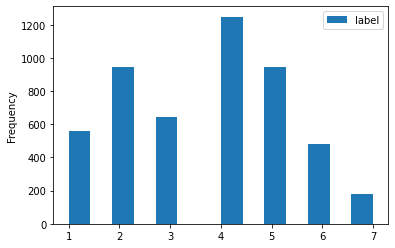

In [5]:
df_labels.plot.hist(bins=14)

**1.a) (1 PUNTO) Explorad los atributos del conjunto de datos.**

**Utilizad el método _describe_ de _pandas.DataFrame_. ¿Qué tipo de información genera?**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

**Analizad la desviación típica de todos los atributos. ¿Pensáis que tienen rangos similares? Identificad los atributos con máxima y mínima dispersión (desviación típica) y proporcionad los valores. ¿Podéis describir brevemente qué pasaría si utilizásemos estos atributos directamente para el análisis PCA?**

In [6]:
df_features.describe(include='all'),df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
dtypes: float64(10)
memory usage: 390.8 KB


(                 0            1            2            3            4  \
 count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
 mean   2590.297600   155.529600    17.599000   183.294000    46.290200   
 std     389.357969   109.718326     9.400014   160.188788    56.633346   
 min    1863.000000     0.000000     0.000000     0.000000  -134.000000   
 25%    2220.000000    66.000000    10.000000    42.000000     3.000000   
 50%    2677.500000   121.500000    17.000000   150.000000    27.000000   
 75%    2905.250000   263.250000    25.000000   277.000000    74.000000   
 max    3442.000000   360.000000    52.000000   997.000000   554.000000   
 
                  5            6            7            8            9  
 count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
 mean   1723.505600   212.261000   215.535000   130.761600  1517.390800  
 std    1564.713429    33.583068    25.150835    50.682969  1324.742471  
 min      30.000000     0.0

In [7]:
100*df_features.std()/df_features.mean()

#Es una estimacion del porcentaje de std que tiene cada una de las columnas

0     15.031399
1     70.544981
2     53.412208
3     87.394452
4    122.344137
5     90.786675
6     15.821591
7     11.669026
8     38.759826
9     87.303974
dtype: float64

(<matplotlib.collections.PathCollection at 0x7f90e342e610>,
 <matplotlib.collections.PathCollection at 0x7f90fea6a6d0>)

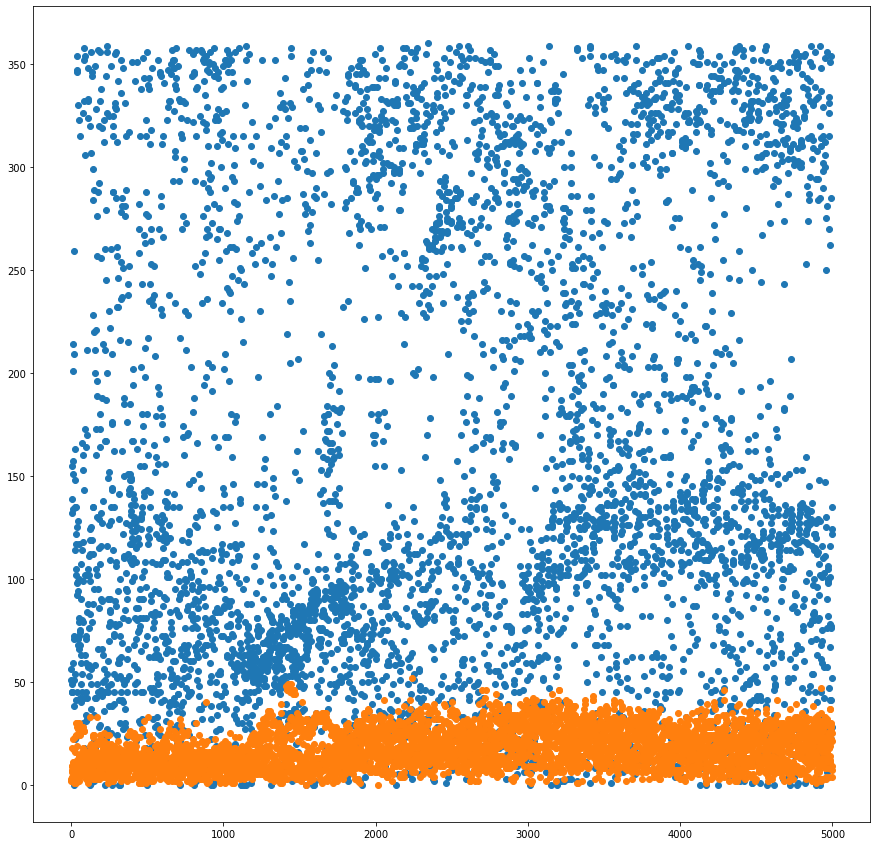

In [8]:
vectorX= np.array(range(0,len(df_features)))
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(vectorX,(df_features[1])),plt.scatter(vectorX,(df_features[2]))

(<matplotlib.collections.PathCollection at 0x7f912b81b050>,
 <matplotlib.collections.PathCollection at 0x7f912b81b3d0>)

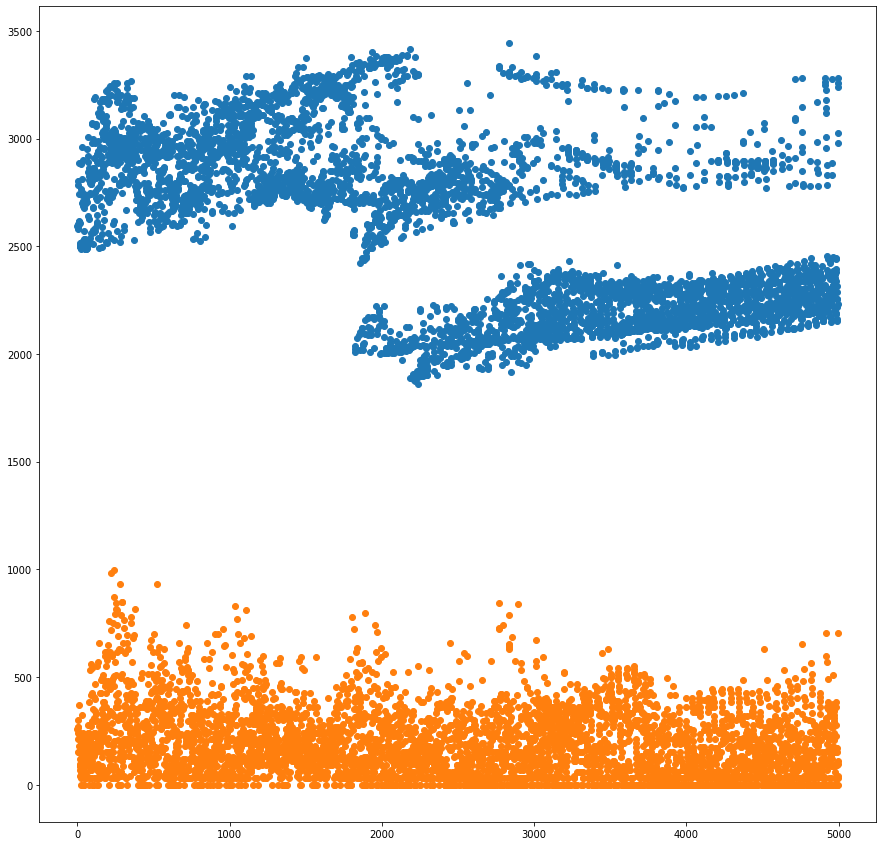

In [9]:
plt.scatter(vectorX,(df_features[0])),plt.scatter(vectorX,(df_features[3]))

(<matplotlib.collections.PathCollection at 0x7f912b3b1090>,
 <matplotlib.collections.PathCollection at 0x7f90ddfc17d0>)

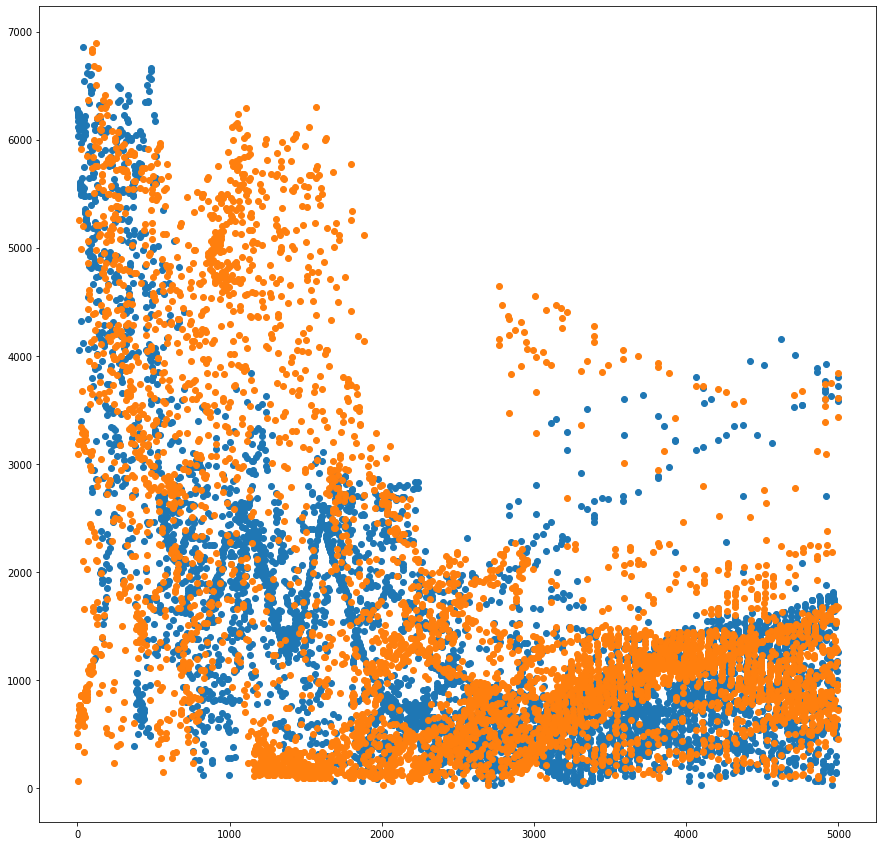

In [10]:
plt.scatter(vectorX,(df_features[9])),plt.scatter(vectorX,(df_features[5]))

R://

**Esta claro al realizar la descripcion del data set que no tenemos mismas condiciones en cada uno de los atributos. El Problema con aplicar PCA es que si los datos contienen demasiados outliers la transformacion de PCA sera incorrecta, muy sensible al procesar linealmente los datos, por tanto la escala importa mucho. Si no contienen la misma escala sensillamente eliminara atributos(columnas que por su baja escala el algoritmo las tomara como no relevantes en comparacion a otras) y con esto perderemos informacion.**








In [11]:
#----------------------------------------------------------------------------------------------------------------------------------------




**1.b) (1 PUNTO) Un análisis PCA siempre se debe realizar sobre datos escalados. Los próximos ejercicios nos permitirán estudiar y aprender sobre PCA además de explorar el impacto del escalado de los datos en el proceso.**

**Aplicad un análisis PCA a los datos dos veces:**
- **Análisis PCA a los datos originales.**
- **Análisis PCA a los datos estandarizados mediante _StandardScaler_:**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**De manera similar al Ejercicio 1.a, pero en este caso para los dos espacios PCA obtenidos, identificad los atributos con máxima y mínima dispersión (desviación típica) y los valores correspondientes. Comentad los resultados.**

In [12]:
# Analisis PCA sin estandarizar los datos.


from sklearn.decomposition import PCA
pca1 = PCA(n_components=10)
pca1.fit(df_features)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca1.explained_variance_ratio_.tolist())



[0.7471036912619199, 0.22610390742201297, 0.01727524026205009, 0.005577985386962992, 0.0030036998645624484, 0.0004418162291034118, 0.00033486574492217294, 0.00014972861121051887, 8.093522701414209e-06, 9.716945541728236e-07]


In [14]:
print(pca1.singular_values_)

[128194.06230782  70523.11759149  19493.48629282  11076.84694869
   8128.41252547   3117.44141899   2714.01866917   1814.804582
    421.93569116    146.19831031]


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_features))
print(scaler.mean_)

std_df = scaler.transform(df_features)


StandardScaler(copy=True, with_mean=True, with_std=True)
[2590.2976  155.5296   17.599   183.294    46.2902 1723.5056  212.261
  215.535   130.7616 1517.3908]


In [16]:
std_df=pd.DataFrame(std_df)
std_df.tail(10)

,0,1,2,3,4,5,6,7,8,9
4990,-0.771341,-0.715810,1.212992,-0.582459,-0.075762,-0.484166,0.885624,-1.691365,-1.771218,-0.324919
4991,-0.856104,-0.724925,0.468238,-0.957054,-0.658515,-0.499506,0.855844,-0.935848,-1.198976,-0.280377
4992,-0.863810,1.809089,0.893811,-0.957054,-0.640856,-0.519320,-1.318088,-1.174432,0.359889,-0.255464
4993,-0.707126,-1.043956,1.319385,-0.082998,0.930813,-0.691254,-0.126892,-2.208299,-1.258174,-0.392863
4994,-0.917750,-1.217144,1.106598,-0.551242,-0.923404,-0.813972,-0.662930,-1.929950,-0.587270,-0.586128
4995,1.774130,-0.287397,-1.127664,-0.957054,-0.782130,1.354054,0.587825,0.774008,0.103367,1.582058
4996,1.715052,-0.305628,-1.446845,-1.144352,-0.817448,1.203852,0.468706,0.813772,0.241494,1.660571
4997,1.671386,-0.943689,0.361844,-0.882135,-0.888085,1.090721,0.409146,-1.015376,-0.843792,1.725496
4998,0.998416,-1.162453,0.787418,-0.470080,-0.270013,-0.029085,-0.305571,-1.492545,-0.587270,1.557899
4999,1.114003,-0.187131,-0.914877,3.244659,2.961622,-0.640760,0.677165,0.813772,0.044169,-0.197334


In [17]:
pca = PCA(n_components=10)
pca.fit(std_df)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.explained_variance_ratio_.tolist())

[0.3148741730145257, 0.24160772599918867, 0.17325700314052503, 0.09116830686701012, 0.05148127258586858, 0.044624123916778495, 0.032422130370195326, 0.028824493949793112, 0.02133789658433739, 0.00040287357177766676]


In [19]:
print(pca.singular_values_)

[125.47393614 109.91081066  93.07443342  67.51603768  50.73523065
  47.23564539  40.26296709  37.9634653   32.66335606   4.48817096]


In [20]:
std_df.describe(include='all'),std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
dtypes: float64(10)
memory usage: 390.8 KB


(                  0             1             2             3             4  \
 count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
 mean   1.416200e-16  2.009781e-16 -4.092282e-16 -1.698819e-15  4.248157e-16   
 std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
 min   -1.868128e+00 -1.417677e+00 -1.872418e+00 -1.144352e+00 -3.183782e+00   
 25%   -9.511418e-01 -8.160766e-01 -8.084839e-01 -8.821350e-01 -7.644706e-01   
 50%    2.239870e-01 -3.101852e-01 -6.372968e-02 -2.078630e-01 -3.406496e-01   
 75%    8.089828e-01  9.818886e-01  7.874180e-01  5.850308e-01  4.893331e-01   
 max    2.187672e+00  1.863780e+00  3.660041e+00  5.080177e+00  8.965753e+00   
 
                   5             6             7             8             9  
 count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  
 mean  -1.889600e-17 -1.925127e-17  4.343415e-16  3.518782e-16 -3.041623e-16  
 std    1.000100e+00  1.000100e+00  1.000

In [21]:
std_df.std()

0    1.0001
1    1.0001
2    1.0001
3    1.0001
4    1.0001
5    1.0001
6    1.0001
7    1.0001
8    1.0001
9    1.0001
dtype: float64

In [22]:
list_std=pca.explained_variance_ratio_.tolist()
list_Non_std= pca1.explained_variance_ratio_.tolist()
for id in range(0,len(list_Non_std)-1):
  print(id,' : ',list_Non_std[id],'||',list_std[id])




0  :  0.7471036912619199 || 0.3148741730145257
1  :  0.22610390742201297 || 0.24160772599918867
2  :  0.01727524026205009 || 0.17325700314052503
3  :  0.005577985386962992 || 0.09116830686701012
4  :  0.0030036998645624484 || 0.05148127258586858
5  :  0.0004418162291034118 || 0.044624123916778495
6  :  0.00033486574492217294 || 0.032422130370195326
7  :  0.00014972861121051887 || 0.028824493949793112
8  :  8.093522701414209e-06 || 0.02133789658433739


In [23]:
#---------------------- ANALISIS -------------------------------------------------------------------------------

Exercicio 1.b: Doble-click (o enter) para añadir vuestra respuesta.

**1.c) (1 PUNTO) Mostrad tres gráficas de dispersión (_scatter plot_) de los dos primeros componentes para:**

- **Los datos originales.**
- **El espacio PCA obtenido a partir de los datos sin escalar (datos originales proyectados al nuevo espacio PCA).**
- **El espacio PCA obtenido a partir de los datos escalados (datos originales escalados y, posteriormente, proyectados al nuevo espacio PCA).**

**Comentad los resultados.**

(<matplotlib.collections.PathCollection at 0x7f90ffc51c10>,
 <matplotlib.collections.PathCollection at 0x7f90ffc51e50>)

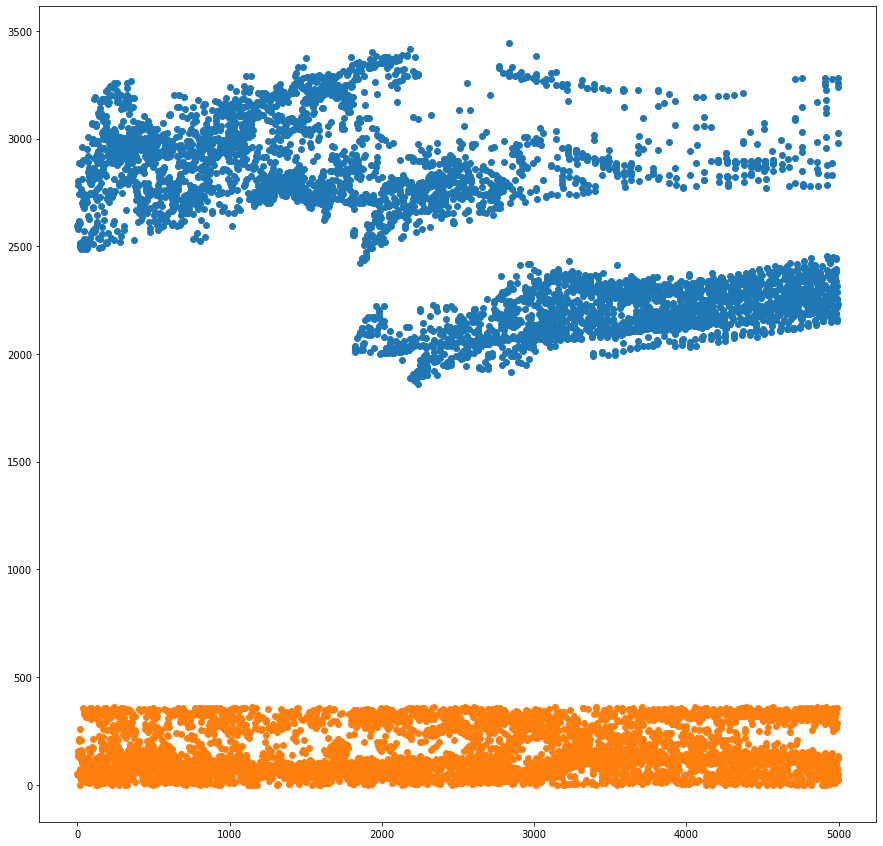

In [24]:
plt.scatter(vectorX,(df_features[0])),plt.scatter(vectorX,(df_features[1]))

(<matplotlib.collections.PathCollection at 0x7f90ea601b10>,
 <matplotlib.collections.PathCollection at 0x7f90ea601a10>)

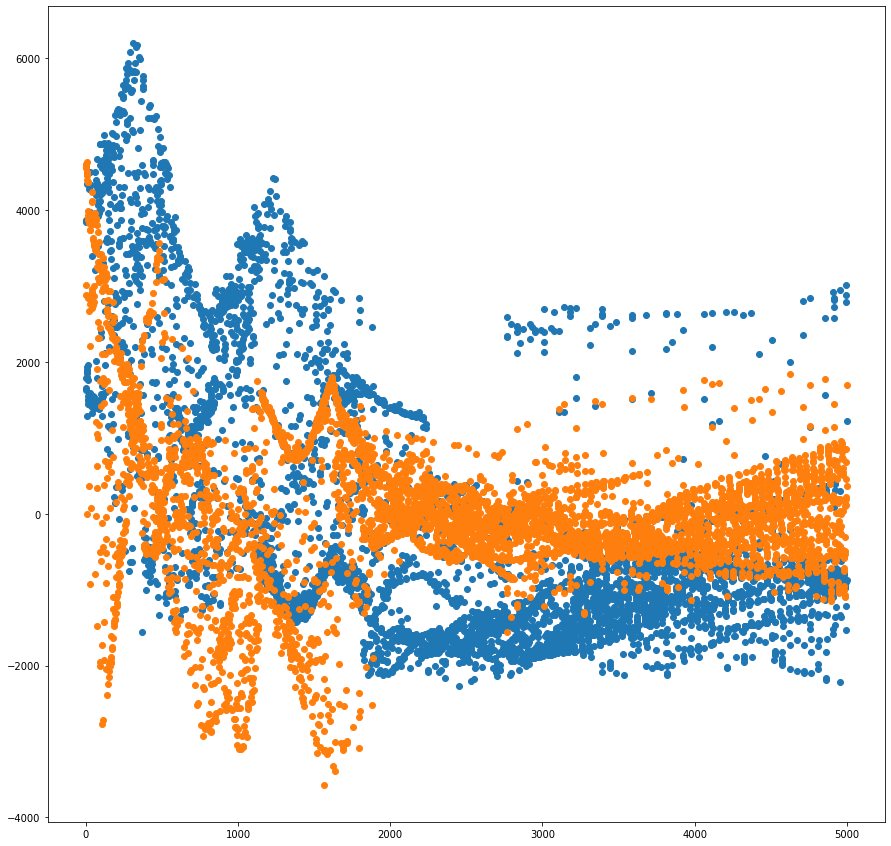

In [25]:
non_std= pca1.fit_transform(df_features)
df_features_non_std= pd.DataFrame(non_std)
#df_features_non_std.tail(10)
plt.scatter(vectorX,(df_features_non_std[0])),plt.scatter(vectorX,(df_features_non_std[1]))

(<matplotlib.collections.PathCollection at 0x7f90c9b8d750>,
 <matplotlib.collections.PathCollection at 0x7f90c9b8d650>)

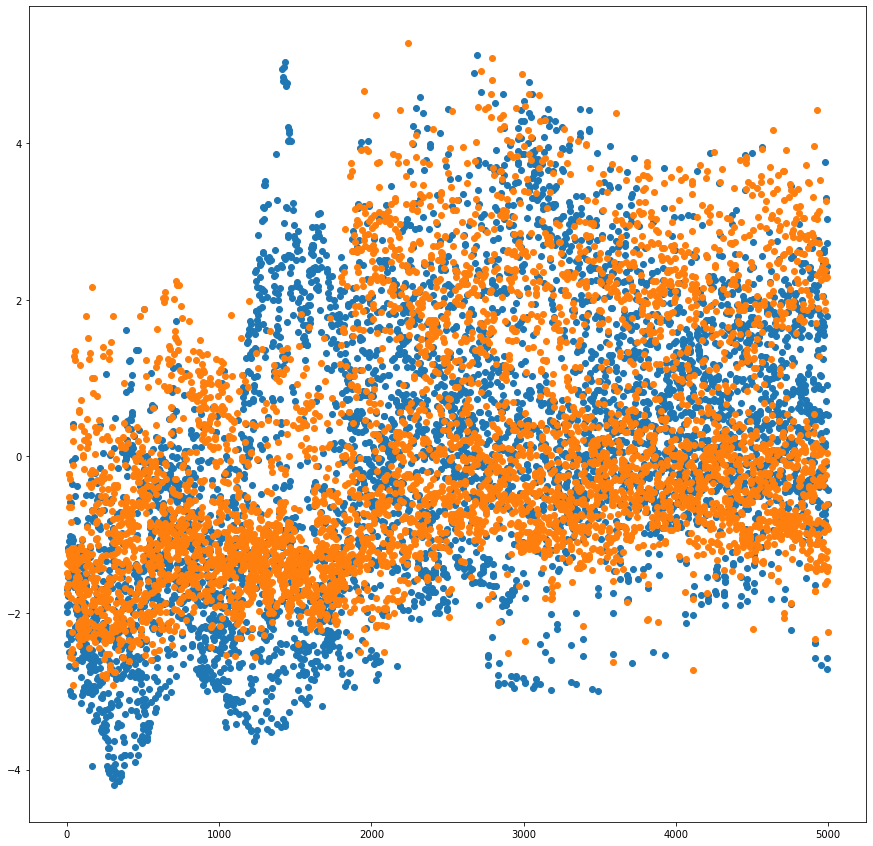

In [26]:
data_std= pca.fit_transform(std_df)
df_features_std= pd.DataFrame(data_std)
#df_features_std.tail(10)
plt.scatter(vectorX,(df_features_std[0])),plt.scatter(vectorX,(df_features_std[1]))

Exercicio 1.c: Doble-click (o enter) para añadir vuestra respuesta.

**1.d) (1 PUNTO) Para los dos espacios PCA obtenidos, con datos escaldados y sin escalar, utilizad la librería _SeaBorn_ y su método _boxplot_ para crear 10 diagramas de cajas (para cada uno) y visualizar los atributos (eje y) para cada clase del conjunto de datos (eje x).**

**_SeaBorn_ es una librería en Python para visualización de datos basada en _matplotlib_ que implementa una interficie de alto nivel para crear atractivos e informativos gráficos estadísticos.**


https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Nota: Utilizad _matplotlib.pyplot.subplots_ con parámetro _sharey=True_ para crear una rejilla de 2x10 ejes (2 filas para los dos espacios PCA y 10 columnas para los 10 atributos).**

In [27]:
# Exercicio 1.d: añadid y ejecutad vuestro código

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")



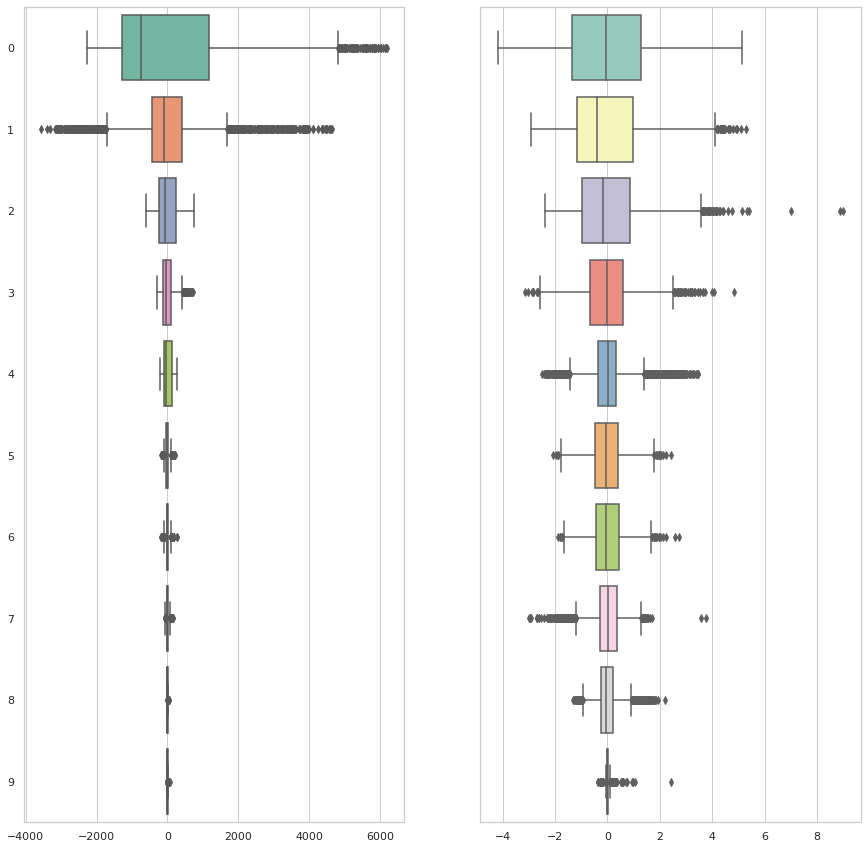

In [29]:
fig, axes = plt.subplots(1,2,sharey=True)

sns.boxplot(data=df_features_non_std, orient="h", palette="Set2",ax=axes[0])
sns.boxplot(data=df_features_std, orient="h", palette="Set3",ax=axes[1])
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

Exercicio 1.d: Doble-click (o enter) para añadir vuestra respuesta.

**1.e) (1 PUNTO) Mostrad las gráficas de la varianza acumulada explicada por los espacios PCA en relación al número de componentes (a partir de datos escalados y sin escalar). Comparadlas y comentad la relación con los diagramas de cajas del ejercicio anterior. En el caso de los datos escalados, identificad cuántos componentes PCA son necesarios para representar un 95% de la varianza de los datos originales. ¿Qué problema hay cuando el análisis PCA se lleva a cabo sobre datos sin escalar?**

In [30]:
# Exercicio 1.e: añadid y ejecutad vuestro código
list_componentes_non_std= pca1.explained_variance_ratio_
list_componentes_std = pca.explained_variance_ratio_
n = range(0,len(list_componentes_std))
list_std= [np.sum(list_componentes_std[:x]) for x in n]
list_non_std = [np.sum(list_componentes_non_std[:x]) for x in n]


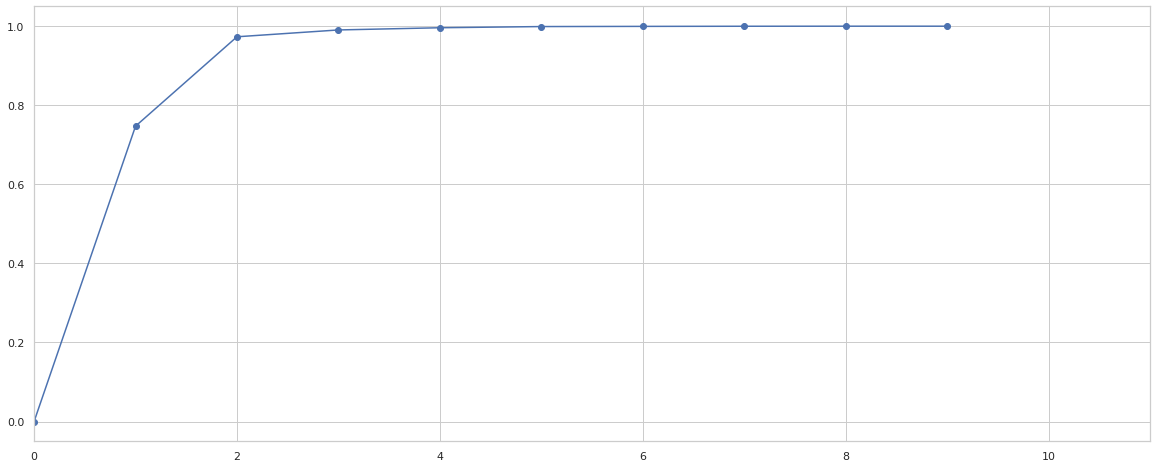

In [31]:

fig, ax = plt.subplots(figsize=(20, 8))

ax.set_xlim(0,11,1)
plt.scatter(range(0,10),list_non_std)
plt.plot(range(0,10),list_non_std)

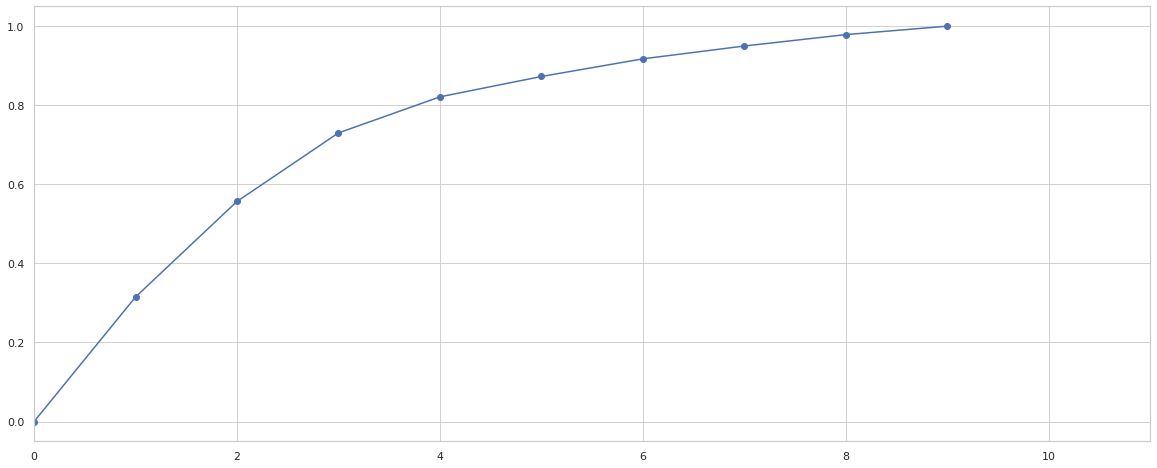

In [32]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.set_xlim(0,11,1)
ax.grid(b=True,which="major",alpha=0.9)
plt.scatter(range(0,10,1),list_std)
plt.plot(range(0,10,1),list_std)

In [33]:
for e in range(0,len(list_non_std)-1):
  if list_non_std[e] > 0.9500:
    print(e)
    print(list_non_std[e])
    break


2
0.9732075986839328


In [34]:
for e in range(0,len(list_std)-1):
  if list_std[e] > 0.9500:
    print(e)
    print(list_std[e])
    break


8
0.978259229843885


Exercicio 1.e: Doble-click (o enter) para añadir vuestra respuesta.

**1.f) (1 PUNTO) Utilizando datos escalados, reconstruid el conjunto de datos con 5 componentes PCA (método _inversetransform_) y calculad la pérdida de información respecto a los datos originales. Para hacerlo, calculad el promedio de las diferencias elevadas al cuadrado entre cada elemento del conjunto reconstruido y del original. ¿Qué relación tienen estos valores respecto a las varianzas acumuladas calculadas en el apartado anterior?**

In [35]:
# Exercicio 1.f: añadid y ejecutad vuestro código

In [36]:
pca5 = PCA(n_components=5)
pca5.fit(std_df)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
df5 = pca5.fit_transform(std_df)
df5 = pd.DataFrame(df5)
df5.tail()

,0,1,2,3,4
4995,-2.570786,-1.596990,-0.797737,0.896633,-0.010194
4996,-2.718920,-1.465420,-1.013629,0.839473,0.206119
4997,-0.609816,-2.240935,-0.341174,2.384250,-0.014046
4998,0.532443,-1.409713,0.259862,2.179521,0.742964
4999,-0.426086,-0.930492,3.529605,-2.855670,0.178950


In [38]:
dfPca5=pca5.inverse_transform(df5)
dfPca5=pd.DataFrame(dfPca5)


In [39]:
dfPca5.shape,std_df.shape
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score
mse = mean_squared_error(std_df, dfPca5)
mae = mean_absolute_error(std_df,dfPca5)
rmse = mean_squared_error(std_df, dfPca5,squared=False)


In [40]:
mse,mae,rmse

(0.12761151839288196, 0.2700797799353716, 0.35722754428078746)

In [41]:
list_std[5]+ mse

1.0

Exercicio 1.f: Doble-click (o enter) para añadir vuestra respuesta.

## EJERCICIO 2

En este ejercicio trabajaremos con diferentes algoritmos de clasificación, técnicas de validación y medidas de evaluación. Para ello utilizaremos una nueva versión del conjunto de datos. La cantidad de muestras se ha reducido aún más y la cantidad de clases se ha reducido a dos para facilitar la comparación entre diferentes algoritmos de clasificación. Estudiad y ejecutad el código proporcionado en la siguiente celda.

In [42]:
n_samples2 = 700
n_attributes2 = 54
df_features2 = pd.DataFrame(features[:n_samples2, :n_attributes2])

labels2 = [1 if value==2 else 0 for value in labels]
df_labels2 = pd.DataFrame({'label': labels2[:n_samples2]})

print("No. of attributes = " + str(len(df_features2.columns)))
print("No. of classes = " + str(len(np.unique(labels2))))
print("No. of samples = " + str(len(df_features2)))
print("\--No. of samples class 0 = " + 
      str(df_labels2[df_labels2==0].count()['label']))
print("\--No. of samples class 1 = " + 
      str(df_labels2[df_labels2==1].count()['label']))

No. of attributes = 54
No. of classes = 2
No. of samples = 700
\--No. of samples class 0 = 289
\--No. of samples class 1 = 411


**2.a) (1.5 PUNTOS) Entrenad los siguientes clasificadores, implementados en _scikit-learn_, utilizando el 80% de los datos disponibles (conjunto de entrenamiento) y calculad el tiempo de entrenamiento para cada uno (módulo python _timeit_):**

- **K Nearest Neighbours: 5 vecinos (primer parámetro).**
- **Linear SVM: kernel =”rbf”, C=25, y valores por defecto para el resto de parámetros.**
- **Decision Tree: criterion =”entropy”, max_depth =5, y valores por defecto para el resto de parámetros.**
- **AdaBoost: valores per defecto.**
- **Gaussian Naive Bayes: valores per defecto.**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [43]:
df_features2.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.000000,700.0,700.0,700.0,700.000000,700.0,700.0,700.0,700.000000,700.0,700.000000,700.000000,700.000000,700.0,700.000000,700.000000,700.000000,700.0,700.0,700.0,700.0,700.000000,700.000000,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.000000,700.000000
mean,2852.752857,138.084286,11.294286,250.102857,32.381429,3314.352857,219.324286,225.770000,138.748571,3791.690000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001429,0.0,0.0,0.0,0.178571,0.0,0.0,0.0,0.034286,0.0,0.065714,0.008571,0.057143,0.0,0.002857,0.062857,0.021429,0.0,0.0,0.0,0.0,0.431429,0.130000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001429,0.004286
std,183.432478,104.249344,6.187044,197.739719,37.657844,1727.782489,20.455310,14.895246,28.866020,1692.174344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037796,0.0,0.0,0.0,0.383267,0.0,0.0,0.0,0.182092,0.0,0.247959,0.092250,0.232281,0.0,0.053414,0.242879,0.144912,0.0,0.0,0.0,0.0,0.495630,0.336544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037796,0.065372
min,2486.000000,0.000000,1.000000,0.000000,-35.000000,67.000000,115.000000,156.000000,36.000000,390.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,2716.750000,54.000000,7.000000,90.000000,5.000000,1770.750000,209.000000,218.000000,121.000000,2334.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,2865.500000,109.500000,10.000000,210.000000,20.000000,3292.500000,223.000000,228.000000,138.000000,3901.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,2982.250000,201.250000,15.000000,362.000000,49.000000,4767.750000,232.000000,235.000000,157.000000,5327.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,3267.000000,359.000000,33.000000,997.000000,210.000000,6890.000000,254.000000,254.000000,240.000000,6853.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


In [44]:
df_labels2.describe()

,label
count,700.000000
mean,0.587143
std,0.492700
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [45]:
# Exercicio 2.a: añadid y ejecutad vuestro código


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

listModels=[]
import timeit


X_train, X_test, y_train, y_test = train_test_split(df_features2, df_labels2, test_size=0.2, random_state=42)


Exercicio 2.a: Doble-click (o enter) para añadir vuestra respuesta.

In [46]:
starttime = timeit.default_timer()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print("The time difference is :", timeit.default_timer() - starttime)

listModels.append(neigh)

The time difference is : 0.009119190999996363


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [47]:
knnScore=neigh.score(X_test,y_test)
rmseKnn= mean_squared_error(y_test, neigh.predict(X_test))
knnScore,rmseKnn

(0.7785714285714286, 0.22142857142857142)

In [48]:
starttime = timeit.default_timer()

svcLinear = SVC(kernel='rbf',C=25)
svcLinear.fit(X_train,y_train)
print("The time difference is :", timeit.default_timer() - starttime)
listModels.append(svcLinear)




The time difference is : 0.039094083999998475


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
SVCScore=svcLinear.score(X_test,y_test)
rmseSVC= mean_squared_error(y_test, svcLinear.predict(X_test))

SVCScore,rmseSVC

(0.7285714285714285, 0.2714285714285714)

In [50]:
#Decision Tree: criterion =”entropy”, max_depth =5, y valores por defecto para el resto de parámetros.
starttime = timeit.default_timer()


clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=5)
clf.fit(X_train,y_train)
print("The time difference is :", timeit.default_timer() - starttime)

listModels.append(clf)

                            

The time difference is : 0.00572587400000657


In [51]:
clfScore=clf.score(X_test,y_test)
rmseSVC= mean_squared_error(y_test, clf.predict(X_test))


clfScore,rmseSVC


(0.6571428571428571, 0.34285714285714286)

In [52]:
starttime = timeit.default_timer()
adaBoostModel = AdaBoostClassifier()
adaBoostModel.fit(X_train, y_train)
print("The time difference is :", timeit.default_timer() - starttime)

listModels.append(adaBoostModel)


                   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The time difference is : 0.12342825700000049


In [53]:
adaScore=adaBoostModel.score(X_test,y_test)
rmseAda= mean_squared_error(y_test, adaBoostModel.predict(X_test))

adaScore,rmseAda

(0.7928571428571428, 0.20714285714285716)

In [54]:
starttime = timeit.default_timer()
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)
print("The time difference is :", timeit.default_timer() - starttime)

listModels.append(gnbModel)


The time difference is : 0.006434395000013637


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
gnbModelScore=gnbModel.score(X_test,y_test)
rmseGnbModel= mean_squared_error(y_test, gnbModel.predict(X_test))

gnbModelScore,rmseGnbModel

(0.7071428571428572, 0.29285714285714287)

**2.b) (1 PUNTO) Evaluación del funcionamiento de los clasificadores entrenados en el Ejercicio 2.a.**

**Mostrad en una única figura todas las curvas ROC correspondientes a los clasificadores utilizando los datos restantes (20% como conjunto de test). Comentad los resultados y comparad el funcionamiento de los diferentes algoritmos. ¿Cuál de ellos sería vuestro escogido para la tarea planteada?**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

In [56]:
# Exercicio 2.b: añadid y ejecutad vuestro código

import matplotlib.pyplot as plt  
from sklearn import metrics

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for model in listModels:
    yproba = model.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  yproba)
    auc = metrics.roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)                             


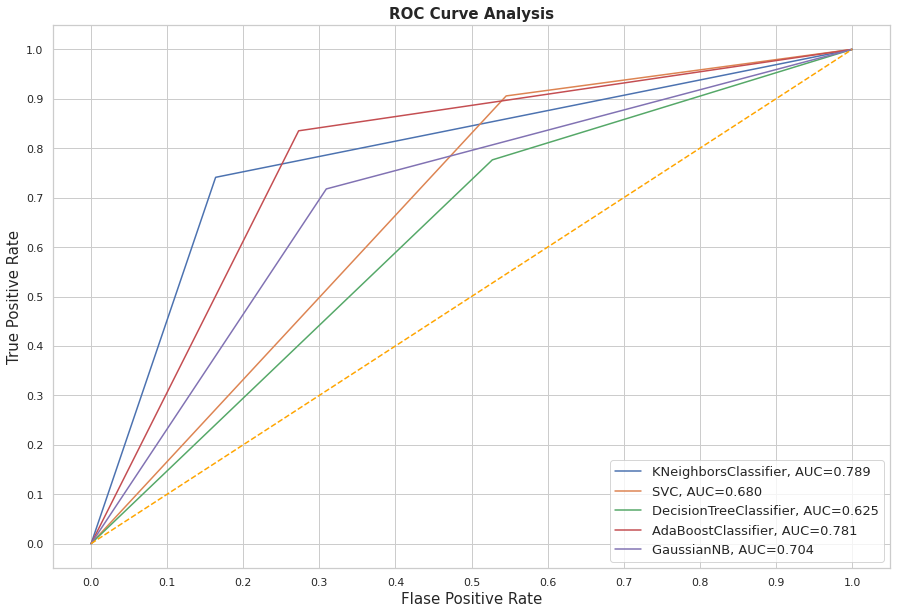

In [57]:
fig = plt.figure(figsize=(15,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


Exercicio 2.b: Doble-click (o enter) para añadir vuestra respuesta.

**2.c) (1.5 PUNTOS) Entrenad y validad los mismos clasificadores descritos en el Ejercicio 2.a utilizando validación cruzada con k=5 en todo el conjunto de datos. Obtened accuracy, precisión, recall, F1-score y ROC-AUC para cada clasificador y comentad los resultados.**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

**Nota: Utilizad _sklearn.model_selection.RepeatedStratifiedKFold_ (con parámetros *n_repeats*=1 y _random_state_=1) en el parámetro _cv_ de _cross_validate_ para crear _splits_ idénticos para validar todos los clasificadores.**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

In [81]:
# Exercicio 2.c: añadid y ejecutad vuestro código

from sklearn.model_selection import cross_validate,RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1,
    random_state=1)
listScores={}
for model in listModels:
  scores = cross_validate(model, df_features2, df_labels2, cv=rskf,
                        scoring=('accuracy', 'precision','recall','f1','roc_auc'))
  listScores[model.__class__.__name__]=scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Exercicio 2.c: Doble-click (o enter) para añadir vuestra respuesta.

In [82]:
import pprint
pprint.pprint(listScores)


{'AdaBoostClassifier': {'fit_time': array([0.11019969, 0.11270165, 0.1216526 , 0.11156297, 0.1137569 ]),
                        'score_time': array([0.02416682, 0.02287674, 0.02853823, 0.02330947, 0.02244711]),
                        'test_accuracy': array([0.77142857, 0.77857143, 0.8       , 0.79285714, 0.77142857]),
                        'test_f1': array([0.80952381, 0.81871345, 0.83333333, 0.82840237, 0.81395349]),
                        'test_precision': array([0.79069767, 0.78651685, 0.81395349, 0.8045977 , 0.78651685]),
                        'test_recall': array([0.82926829, 0.85365854, 0.85365854, 0.85365854, 0.84337349]),
                        'test_roc_auc': array([0.87195122, 0.86059714, 0.85660219, 0.87636669, 0.86789262])},
 'DecisionTreeClassifier': {'fit_time': array([0.00631976, 0.0061717 , 0.00583839, 0.00597596, 0.00580168]),
                            'score_time': array([0.00585985, 0.00595403, 0.00578237, 0.00577593, 0.00582623]),
                         